<a href="https://colab.research.google.com/github/Pavithran27/Machine_learning/blob/main/Brain_Tumor_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#vggg16

In [ ]:
print("hi")

hi


In [ ]:
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D ,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train=ImageDataGenerator(rescale=1./255,validation_split=0.15)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
import random
random.sample(range(0,len("/content/drive/MyDrive/BrainTumour/Testing/glioma_tumor")))

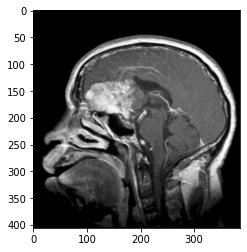

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/BrainTumour/Testing/glioma_tumor/image(10).jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(406, 386, 3)

In [ ]:
train_data=train.flow_from_directory('/content/drive/MyDrive/BrainTumour/Training',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True,subset="training")
test_data=test.flow_from_directory('/content/drive/MyDrive/BrainTumour/Testing',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True)
val_data=train.flow_from_directory('/content/drive/MyDrive/BrainTumour/Training',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True,subset="validation")

Found 2441 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 429 images belonging to 4 classes.


In [ ]:
train_data.total_batches_seen

0

In [ ]:
len(train_data)

77

In [ ]:
162*16

2592

In [ ]:
32*81

2592

In [ ]:
2297 / 32

71.78125

In [ ]:
601*4

2404

In [ ]:
2297 // 4

574

In [ ]:
574 // 32

17

In [ ]:
len(train_data)

81

In [ ]:
train_data[71][0][1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.00784314],
        [0.00784314],
        [0.00784314]],

       ...,

       [[0.00392157],
        [0.00392157],
        [0.00392157],
        ...,
        [0.01176471],
        [0.01568628],
        [0.01176471]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.00784314],
        [0.00784314],
        [0.00392157]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.00392157],
        [0.00392157],
        [0.        ]]], dtype=float32)

In [ ]:
import tensorflow as tf

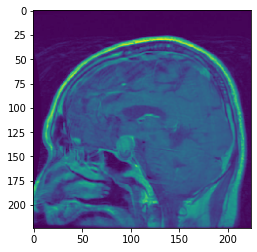

In [ ]:
plt.imshow((tf.squeeze(train_data[71][0][1])))

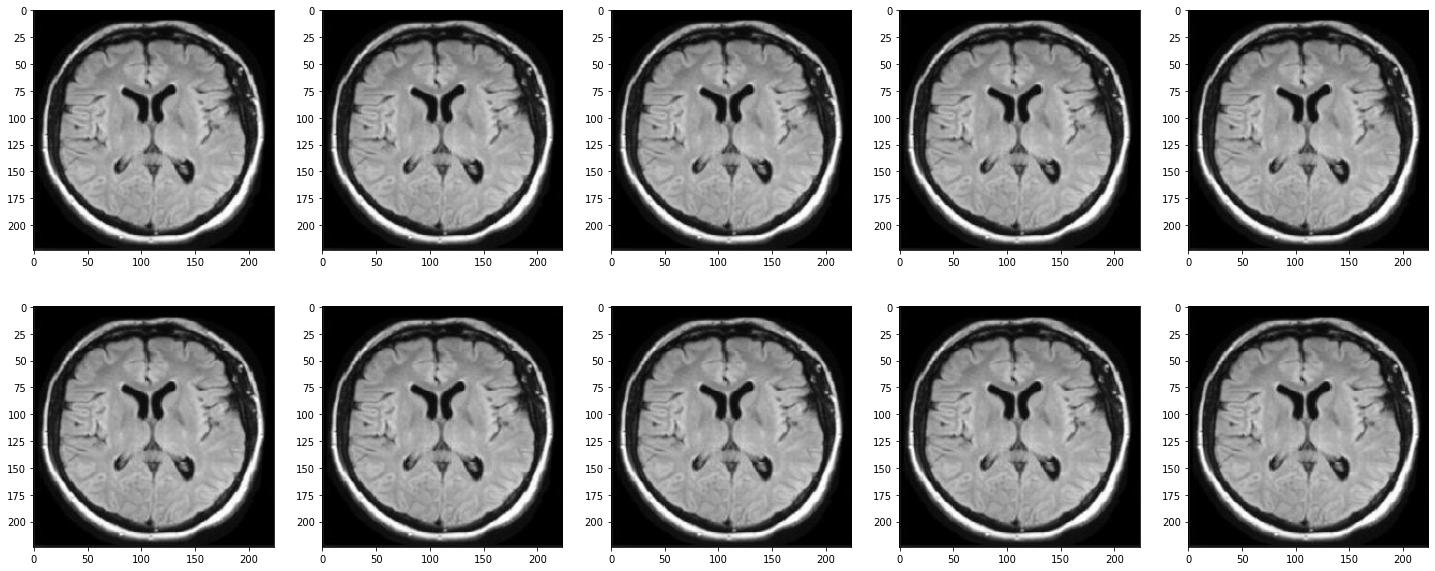

In [ ]:
rows = 2
columns = 5
fig = plt.figure(figsize=(25, 10))
for k in range(0,10):
  fig.add_subplot(rows, columns, k+1)
  plt.imshow(train_data[0][0][0])

In [ ]:
np.unique(test_data.classes)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
ww=train_data.class_indices

In [ ]:
ww

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [ ]:
new_list = list(ww.keys())
print(new_list)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
new_list[0]

'glioma_tumor'

In [ ]:
print(ww.get(0))

None


In [ ]:
np.unique(train_data.classes)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
(train_data[45][1][1])

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
rr=np.where(train_data[21][1][1] == 1)

In [ ]:
rrr=rr[0][0]

In [ ]:
type(rr[0][0])

numpy.int64

In [ ]:
new_list[rrr]

'glioma_tumor'

In [ ]:
import random
fig = plt.figure(figsize=(25, 10))
randomlist = random.sample(range(10, 30), 5)
rows = 2
columns = 5

for i in randomlist:
  print(i)
  print(randomlist.index(i))

11
0
16
1
25
2
12
3
20
4


<Figure size 1800x720 with 0 Axes>

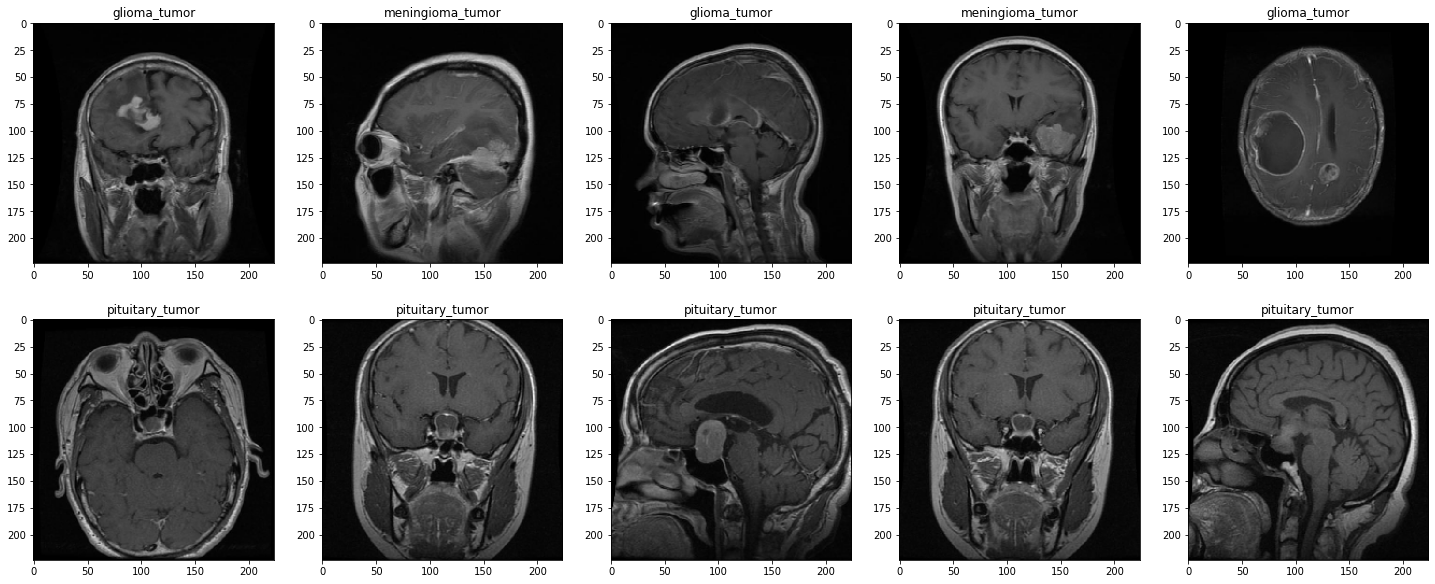

In [ ]:
import random
fig = plt.figure(figsize=(25, 10))
randomlist = random.sample(range(10, 71), 10)
rows = 2
columns = 5
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(train_data[i][1][30] == 1)
  rrr=rr[0][0]

  plt.title(new_list[rrr])
  plt.imshow(train_data[i][0][30])
  #print(i)
  #batch size 30

[0. 0. 0. 1.]


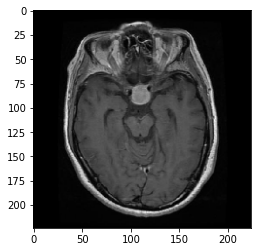

In [ ]:
plt.imshow(train_data[50][0][1])
print(train_data[50][1][1])

In [ ]:
type(randomlist[1])

int

[0. 0. 1. 0.]


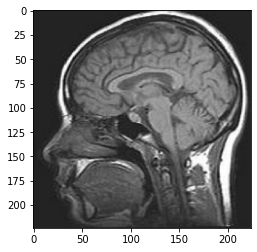

In [ ]:
plt.imshow(train_data[62][0][1])
print(train_data[62][1][1])

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
#model = VGG16(weights='imagenet')

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten



x = Flatten()(model.output)
x=Dense(256,activation='relu')(x)
prediction=Dense(4, activation='softmax')(x)
model = Model(inputs=model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
#Early stopping to avoid overfitting of model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
len(train_data)

77

In [ ]:
# fit the model
history = model.fit(
 train_data,
  
  validation_data=val_data,
  epochs=25,
  callbacks=[early_stop,checkpoint],shuffle=True)

Epoch 1/25
77/77 [==============================] - ETA: 0s - loss: 1.0065 - accuracy: 0.7423

77/77 [==============================] - 26s 263ms/step - loss: 1.0065 - accuracy: 0.7423 - val_loss: 1.0280 - val_accuracy: 0.5991
Epoch 2/25
77/77 [==============================] - ETA: 0s - loss: 0.3677 - accuracy: 0.8615

77/77 [==============================] - 18s 230ms/step - loss: 0.3677 - accuracy: 0.8615 - val_loss: 0.5516 - val_accuracy: 0.7855
Epoch 3/25
77/77 [==============================] - ETA: 0s - loss: 0.1267 - accuracy: 0.9586

77/77 [==============================] - 18s 229ms/step - loss: 0.1267 - accuracy: 0.9586 - val_loss: 0.7077 - val_accuracy: 0.7669
Epoch 4/25
77/77 [==============================] - ETA: 0s - loss: 0.0808 - accuracy: 0.9742

77/77 [==============================] - 18s 229ms/step - loss: 0.0808 - accuracy: 0.9742 - val_loss: 0.5564 - val_accuracy: 0.8159
Epoch 5/25
77/77 [==============================] - ETA: 0s - loss: 0.0484 - accuracy: 0.9881

77/77 [==============================] - 18s 228ms/step - loss: 0.0484 - accuracy: 0.9881 - val_loss: 0.5888 - val_accuracy: 0.8252
Epoch 6/25
77/77 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9898

77/77 [==============================] - 18s 230ms/step - loss: 0.0413 - accuracy: 0.9898 - val_loss: 0.5508 - val_accuracy: 0.8345
Epoch 7/25
77/77 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9984

77/77 [==============================] - 18s 229ms/step - loss: 0.0231 - accuracy: 0.9984 - val_loss: 0.4852 - val_accuracy: 0.8462
Epoch 8/25
77/77 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 0.9943

77/77 [==============================] - 18s 229ms/step - loss: 0.0286 - accuracy: 0.9943 - val_loss: 0.7068 - val_accuracy: 0.7786
Epoch 9/25
77/77 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9975

77/77 [==============================] - 18s 230ms/step - loss: 0.0191 - accuracy: 0.9975 - val_loss: 0.6847 - val_accuracy: 0.8182
Epoch 10/25
77/77 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9988

77/77 [==============================] - 18s 237ms/step - loss: 0.0122 - accuracy: 0.9988 - val_loss: 0.6080 - val_accuracy: 0.8438
Epoch 11/25
77/77 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000

77/77 [==============================] - 18s 228ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.5809 - val_accuracy: 0.8508
Epoch 12/25
77/77 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000

77/77 [==============================] - 18s 231ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.6561 - val_accuracy: 0.8368
Epoch 13/25
77/77 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000

77/77 [==============================] - 18s 229ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6328 - val_accuracy: 0.8415
Epoch 14/25
77/77 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000

77/77 [==============================] - 18s 229ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.6245 - val_accuracy: 0.8485
Epoch 15/25
77/77 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000

77/77 [==============================] - 18s 228ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6173 - val_accuracy: 0.8508
Epoch 16/25
77/77 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

77/77 [==============================] - 18s 229ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6214 - val_accuracy: 0.8578
Epoch 17/25
77/77 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

77/77 [==============================] - 18s 228ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6322 - val_accuracy: 0.8531
Epoch 17: early stopping


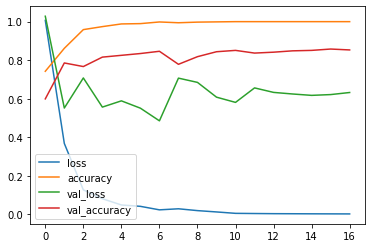

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
_, accuracy = history.model.evaluate(test_data)
print("Model accuracy: %.2f"% (accuracy*100))

13/13 [==============================] - 3s 262ms/step - loss: 3.3847 - accuracy: 0.7132
Model accuracy: 71.32


In [ ]:
_, accuracy = history.model.evaluate(val_data)
print("Model accuracy: %.2f"% (accuracy*100))

14/14 [==============================] - 3s 193ms/step - loss: 0.6322 - accuracy: 0.8531
Model accuracy: 85.31


In [ ]:
vgg_preds = model.predict(test_data)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

In [ ]:
vgg_pred_classes

array([1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1,
       1, 1, 2, 3, 2, 1, 1, 2, 3, 1, 1, 1, 0, 2, 2, 3, 3, 0, 1, 2, 2, 1,
       2, 3, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 3, 1, 1, 1, 2, 0, 1, 3, 2, 2,
       1, 3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 3, 1, 2, 3, 1, 2, 1, 2, 3, 0, 1,
       3, 1, 1, 1, 2, 2, 3, 2, 1, 2, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 3, 2, 1, 0, 2, 2,
       3, 1, 2, 3, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 3, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2,
       2, 3, 2, 2, 3, 3, 1, 3, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 3, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 3, 2,

In [ ]:
true_classes=test_data.classes

In [ ]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 24.62%


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
confusion_matrix(test_data.classes,vgg_pred_classes)

array([[ 8, 45, 40,  7],
       [ 8, 45, 47, 15],
       [ 1, 55, 35, 14],
       [ 3, 37, 25,  9]])

In [ ]:
print(classification_report(test_data.classes,vgg_pred_classes))

              precision    recall  f1-score   support

           0       0.40      0.08      0.13       100
           1       0.25      0.39      0.30       115
           2       0.24      0.33      0.28       105
           3       0.20      0.12      0.15        74

    accuracy                           0.25       394
   macro avg       0.27      0.23      0.22       394
weighted avg       0.27      0.25      0.22       394



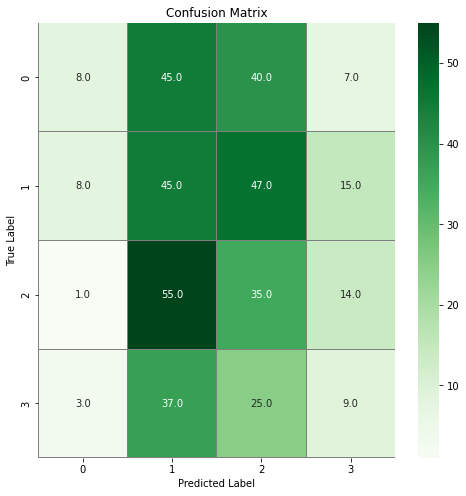

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(test_data.classes,vgg_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
len(test_data)

13

In [ ]:
randomlist = random.sample(range(0, len(test_data)), 10)

In [ ]:
randomlist

[11, 12, 8, 0, 7, 1, 4, 5, 9, 10]

array([0., 0., 1., 0.], dtype=float32)

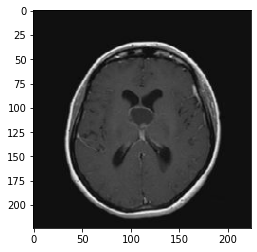

In [ ]:
plt.imshow(test_data[0][0][1])
test_data[0][1][1]

In [ ]:
 aa=test_data[11][0][20]

In [ ]:
new_list

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [ ]:
qq=test_data[11][1][20]

In [ ]:
qq

array([0., 1., 0., 0.], dtype=float32)

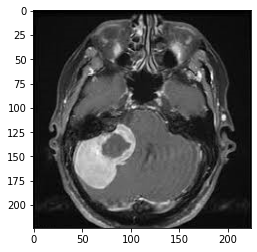

In [ ]:
plt.imshow(aa)

In [ ]:
aa.shape

(224, 224, 3)

In [ ]:
bb=np.expand_dims(aa,axis=0)

In [ ]:
bb.shape

(1, 224, 224, 3)

In [ ]:
z=model.predict(bb)

In [ ]:
z[0]

array([6.8875528e-07, 9.8884881e-01, 9.8408889e-03, 1.3096113e-03],
      dtype=float32)

In [ ]:
zz=np.argmax(z, axis=1)

In [ ]:
zz

array([1])

In [ ]:
zz[0]

1

In [ ]:
zz=zz[0]

In [ ]:
zz

1

In [ ]:
z[0][zz]

0.9888488

In [ ]:
print("%.2f"% (z[0][zz]*100))

98.88


In [ ]:
rr=np.where(qq == 1)
rrr=rr[0][0]

In [ ]:
rr[0]

array([1])

In [ ]:
new_list[zz]

'meningioma_tumor'

In [ ]:
new_list[rrr]

'meningioma_tumor'

In [ ]:
len(test_data)

13

In [ ]:
13*32

416

In [ ]:
new_list[zz]

'meningioma_tumor'

In [ ]:
new1="{:.2f}%".format(z[0][zz]*100),new_list[zz[0]]

In [ ]:
new1

('98.88%', 'meningioma_tumor')

12
3
8
5
9
0
10
7
2
1


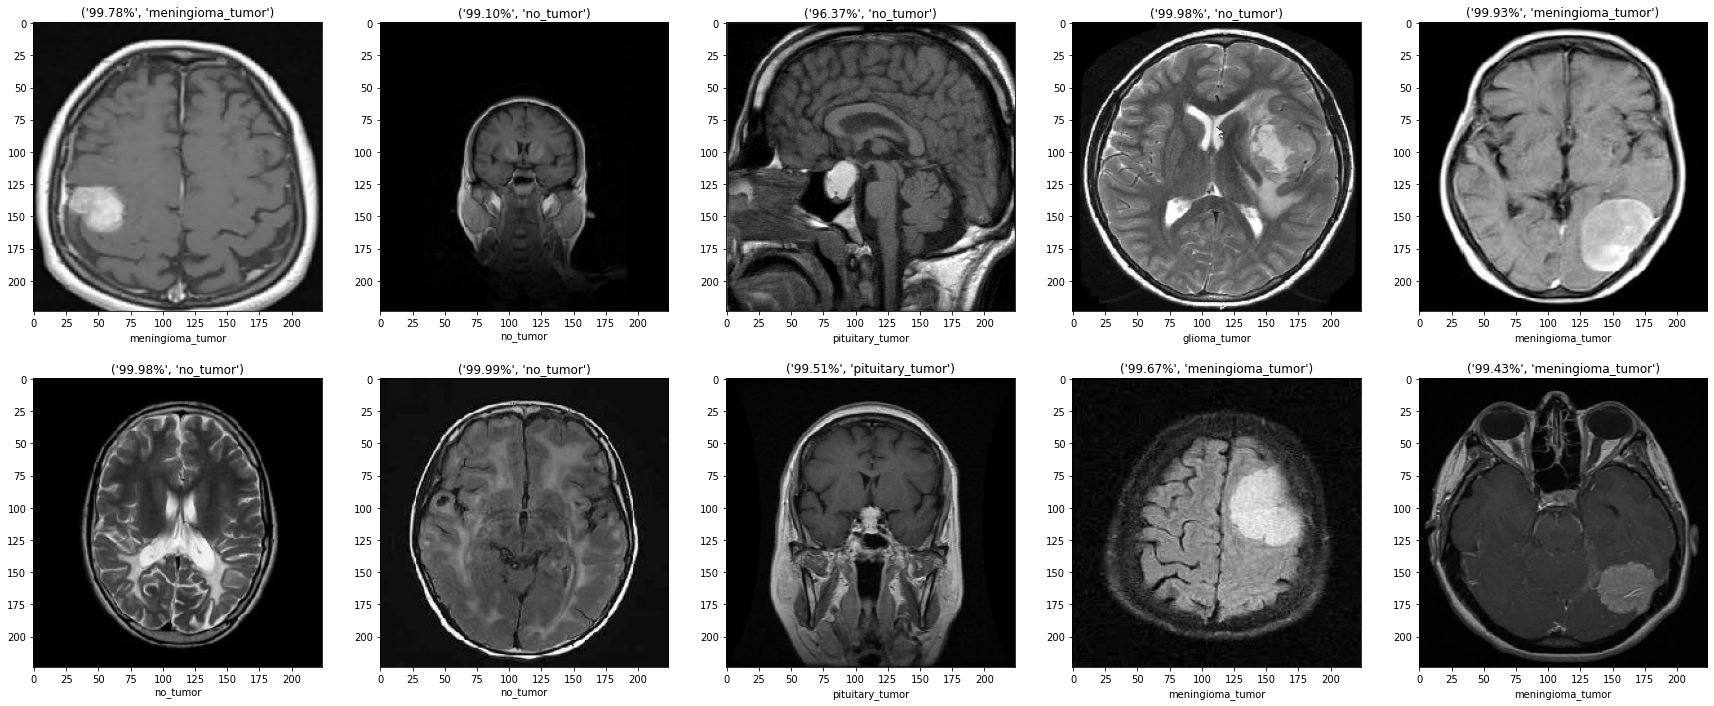

In [ ]:
#batch 0
import random
fig = plt.figure(figsize=(30, 12))
randomlist = random.sample(range(0, 13), 10)
rows = 2
columns = 5
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(test_data[i][1][0] == 1)
  rrr=rr[0][0]

  aa=test_data[i][1][0]
  bb=test_data[i][0][0]
  bb=np.expand_dims(bb,axis=0)
  z=model.predict(bb)
  zz=np.argmax(z, axis=1)
  
  if zz[0]==0:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==1:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==2:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  else :
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  plt.imshow(test_data[i][0][0])
  print(i)

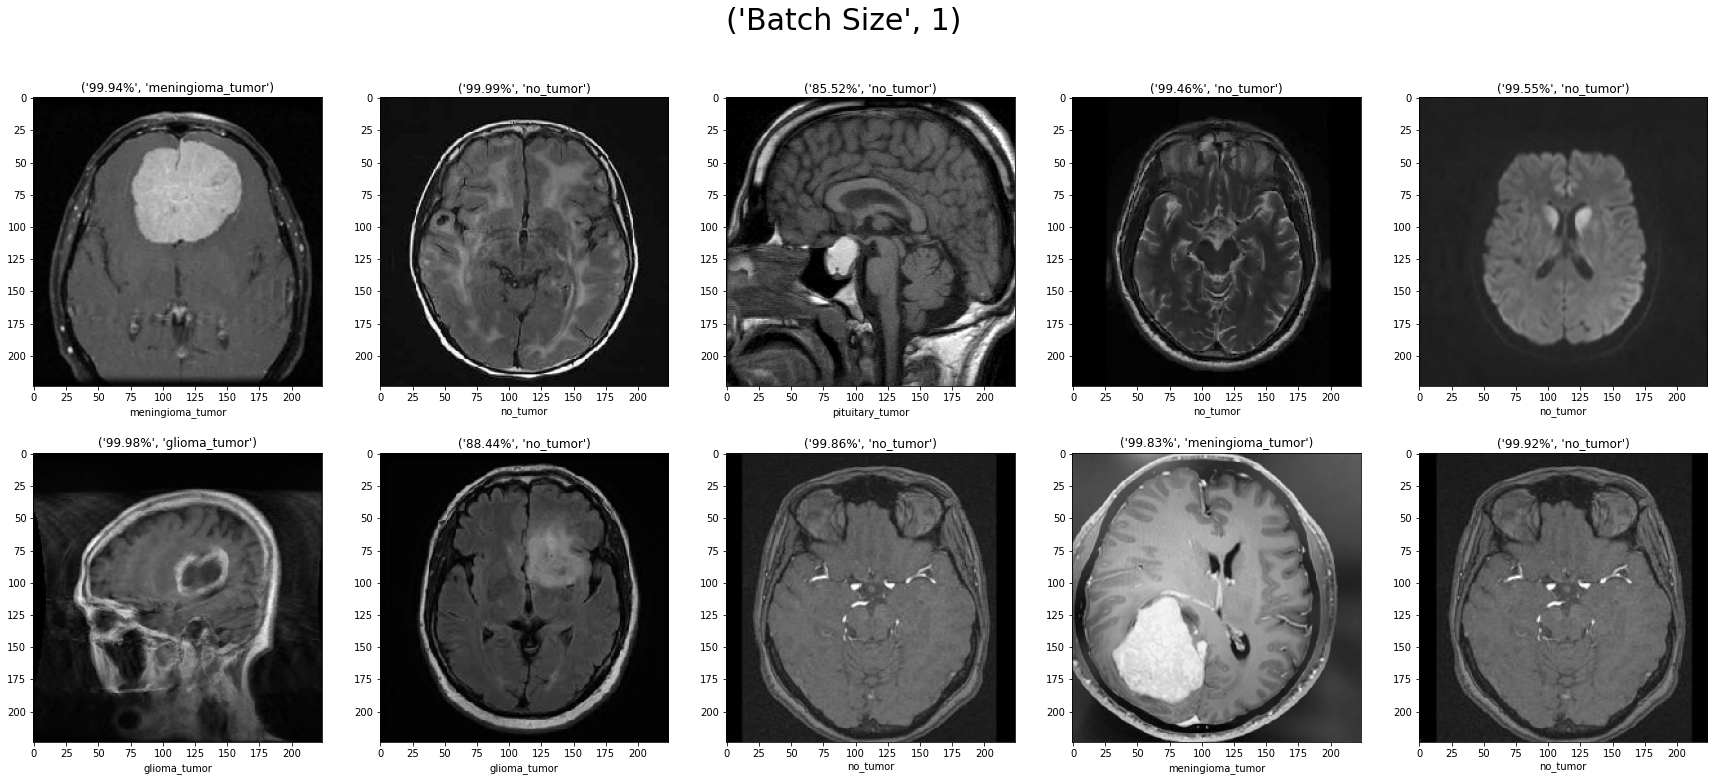

In [ ]:
#batch 1
import random
fig = plt.figure(figsize=(30, 12))
randomlist = random.sample(range(0, 13), 10)
rows = 2
columns = 5
bs=1 
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(test_data[i][1][bs] == 1)
  rrr=rr[0][0]

  aa=test_data[i][1][bs]
  bb=test_data[i][0][bs]
  bb=np.expand_dims(bb,axis=0)
  z=model.predict(bb)
  zz=np.argmax(z, axis=1)
  fig.suptitle(("Batch Size",bs),fontsize=30)
  if zz[0]==0:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==1:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==2:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  else :
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  plt.imshow(test_data[i][0][bs])
  #print(i)


array([0., 1., 0., 0.], dtype=float32)

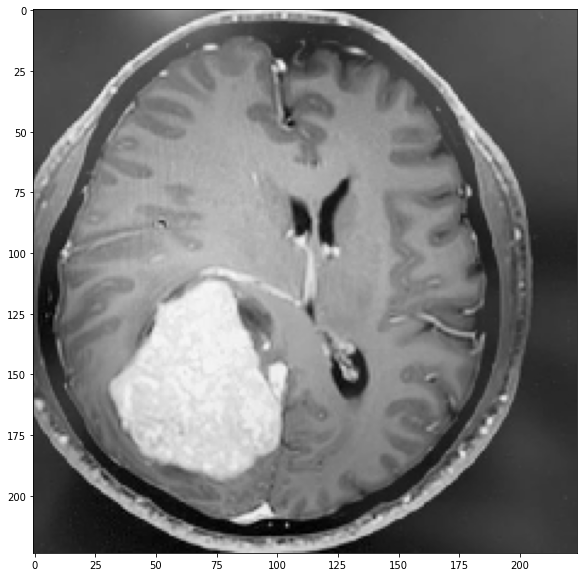

In [ ]:
fig = plt.figure(figsize=(12, 10))
plt.imshow(test_data[7][0][1])
test_data[7][1][1]

In [ ]:
#prediction


from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

https://step2.medbullets.com/oncology/120395/meningioma

In [ ]:
img_path = '/content/mengioma.jpg'
img = image.load_img(img_path, target_size=(224, 224))

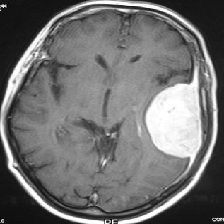

In [ ]:
display(img)

In [ ]:
x = image.img_to_array(img)


x = np.expand_dims(x, axis=0)

x.shape

(1, 224, 224, 3)

In [ ]:
x = preprocess_input(x)

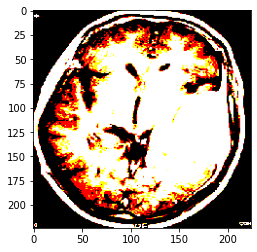

In [ ]:
plt.imshow(x[0])

In [ ]:
features= model.predict(x)

In [ ]:
features

array([[0.000000e+00, 1.000000e+00, 7.080576e-38, 0.000000e+00]],
      dtype=float32)

In [ ]:
features_final=np.argmax(features, axis=1)

In [ ]:
features_final

array([1])

In [ ]:
new_list[features_final[0]]

'meningioma_tumor'

# Resnet50

In [ ]:
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D ,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train=ImageDataGenerator(rescale=1./255,validation_split=0.15)
test=ImageDataGenerator(rescale=1./255)

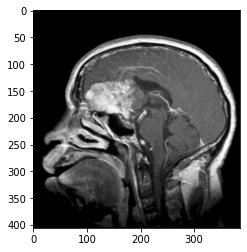

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/BrainTumour/Testing/glioma_tumor/image(10).jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
train_data=train.flow_from_directory('/content/drive/MyDrive/BrainTumour/Training',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True,subset="training")
test_data=test.flow_from_directory('/content/drive/MyDrive/BrainTumour/Testing',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True)
val_data=train.flow_from_directory('/content/drive/MyDrive/BrainTumour/Training',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True,subset="validation")

Found 2441 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 429 images belonging to 4 classes.


In [ ]:
len(train_data)

77

In [ ]:
import tensorflow as tf

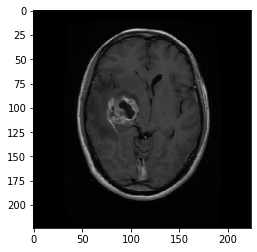

In [ ]:
plt.imshow(((train_data[76][0][1])))

In [ ]:
(train_data[76][0][1]).shape

(224, 224, 3)

In [ ]:
ff=train_data[76][0][1]

In [ ]:
grey_image_arr_3_channel = ff.repeat(3, axis=-1)

In [ ]:
grey_image_arr_3_channel.shape

(224, 224, 3)

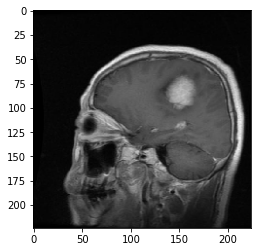

In [ ]:
plt.imshow(grey_image_arr_3_channel)

In [ ]:
ww=train_data.class_indices

In [ ]:
ww

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [ ]:
new_list = list(ww.keys())
print(new_list)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
new_list[0]

'glioma_tumor'

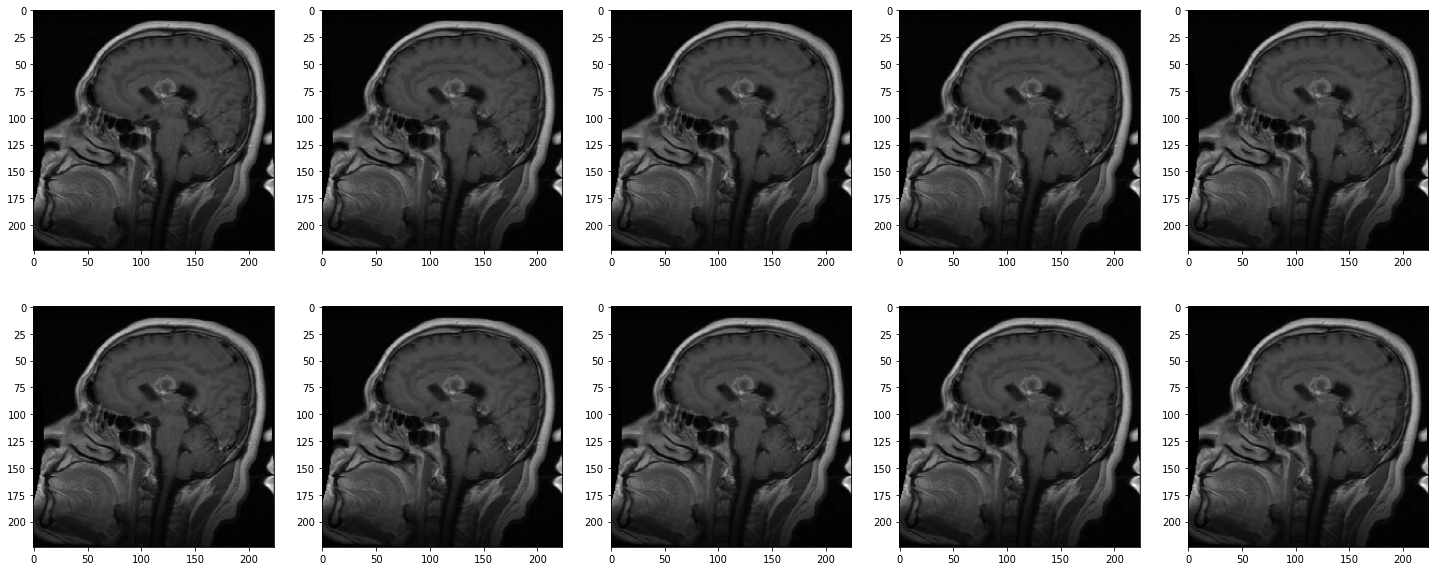

In [ ]:
rows = 2
columns = 5
fig = plt.figure(figsize=(25, 10))
for k in range(0,10):
  fig.add_subplot(rows, columns, k+1)
  plt.imshow(train_data[0][0][0])

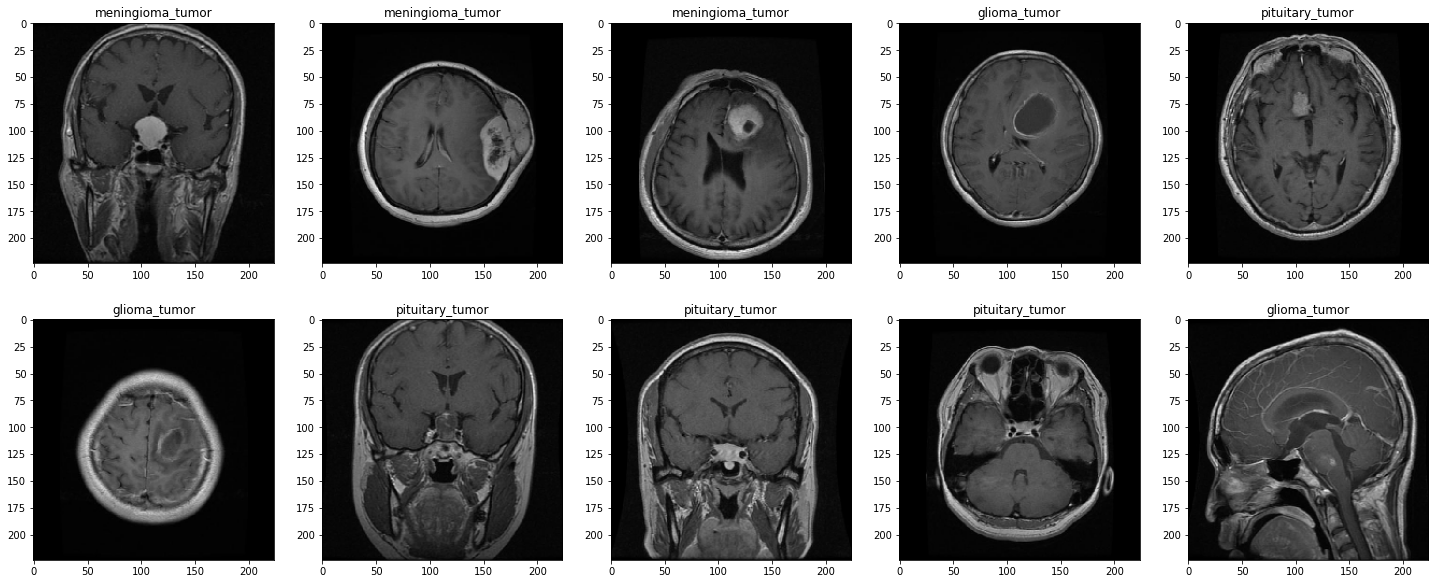

In [ ]:
import random
fig = plt.figure(figsize=(25, 10))
randomlist = random.sample(range(10, 71), 10)
rows = 2
columns = 5
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(train_data[i][1][30] == 1)
  rrr=rr[0][0]

  plt.title(new_list[rrr])
  plt.imshow(train_data[i][0][30])
  #print(i)
  #batch size 30

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2

import tensorflow as tf
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [ ]:

model =tf.keras.applications.Xception(weights='imagenet', include_top=False,input_shape=(224, 224,3))
#model = VGG16(weights='imagenet')

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten



x = Flatten()(model.output)
x=Dense(256,activation='relu')(x)
prediction=Dense(4, activation='softmax')(x)
model = Model(inputs=model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
len(train_data)

77

In [ ]:
# fit the model
history = model.fit(
 train_data,
  
  validation_data=val_data,
  epochs=25,
  callbacks=[early_stop,checkpoint],shuffle=True)

Epoch 1/25
77/77 [==============================] - ETA: 0s - loss: 5.5413 - accuracy: 0.7112

77/77 [==============================] - 26s 255ms/step - loss: 5.5413 - accuracy: 0.7112 - val_loss: 0.6914 - val_accuracy: 0.7879
Epoch 2/25
77/77 [==============================] - ETA: 0s - loss: 0.2382 - accuracy: 0.9156

77/77 [==============================] - 19s 244ms/step - loss: 0.2382 - accuracy: 0.9156 - val_loss: 0.4600 - val_accuracy: 0.8531
Epoch 3/25
77/77 [==============================] - ETA: 0s - loss: 0.1121 - accuracy: 0.9590

77/77 [==============================] - 18s 229ms/step - loss: 0.1121 - accuracy: 0.9590 - val_loss: 0.6387 - val_accuracy: 0.8322
Epoch 4/25
77/77 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9685

77/77 [==============================] - 18s 227ms/step - loss: 0.0885 - accuracy: 0.9685 - val_loss: 0.4434 - val_accuracy: 0.8601
Epoch 5/25
77/77 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.9848

77/77 [==============================] - 18s 229ms/step - loss: 0.0464 - accuracy: 0.9848 - val_loss: 0.6734 - val_accuracy: 0.8438
Epoch 6/25
77/77 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9971

77/77 [==============================] - 18s 227ms/step - loss: 0.0195 - accuracy: 0.9971 - val_loss: 0.5611 - val_accuracy: 0.8601
Epoch 7/25
77/77 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9996

77/77 [==============================] - 18s 227ms/step - loss: 0.0100 - accuracy: 0.9996 - val_loss: 0.6709 - val_accuracy: 0.8368
Epoch 8/25
77/77 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000

77/77 [==============================] - 18s 228ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.6461 - val_accuracy: 0.8438
Epoch 9/25
77/77 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000

77/77 [==============================] - 17s 226ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.6292 - val_accuracy: 0.8555
Epoch 9: early stopping


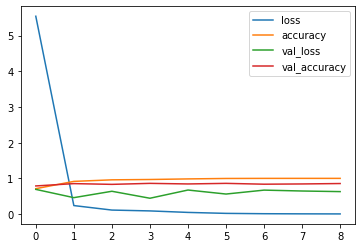

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
_, accuracy = history.model.evaluate(test_data)
print("Model accuracy: %.2f"% (accuracy*100))

13/13 [==============================] - 3s 214ms/step - loss: 2.3821 - accuracy: 0.7437
Model accuracy: 74.37


In [ ]:
_, accuracy = history.model.evaluate(val_data)
print("Model accuracy: %.2f"% (accuracy*100))

14/14 [==============================] - 3s 184ms/step - loss: 0.6292 - accuracy: 0.8555
Model accuracy: 85.55


In [ ]:
vgg_preds = model.predict(test_data)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

In [ ]:
vgg_pred_classes

array([2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 3, 2, 2, 3, 1, 2, 2, 2, 1, 2, 1,
       1, 3, 2, 2, 1, 3, 1, 3, 1, 2, 1, 2, 2, 1, 1, 3, 0, 1, 1, 3, 1, 0,
       1, 1, 2, 1, 2, 3, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 3, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 1,
       2, 0, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 3, 2, 1, 1, 2,
       1, 2, 2, 1, 3, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 3, 3, 1, 2,
       3, 1, 1, 1, 1, 3, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 2, 3, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 1, 1, 3, 1,
       2, 3, 1, 1, 3, 2, 1, 1, 1, 2, 2, 3, 3, 1, 3, 3, 2, 2, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       3, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2,
       1, 3, 3, 1, 3, 3, 1, 1, 0, 2, 2, 2, 1, 2, 2,

In [ ]:
true_classes=test_data.classes

In [ ]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 26.40%


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
confusion_matrix(test_data.classes,vgg_pred_classes)

array([[10, 46, 30, 14],
       [ 3, 53, 39, 20],
       [ 9, 49, 34, 13],
       [ 6, 28, 33,  7]])

In [ ]:
print(classification_report(test_data.classes,vgg_pred_classes))

              precision    recall  f1-score   support

           0       0.36      0.10      0.16       100
           1       0.30      0.46      0.36       115
           2       0.25      0.32      0.28       105
           3       0.13      0.09      0.11        74

    accuracy                           0.26       394
   macro avg       0.26      0.24      0.23       394
weighted avg       0.27      0.26      0.24       394



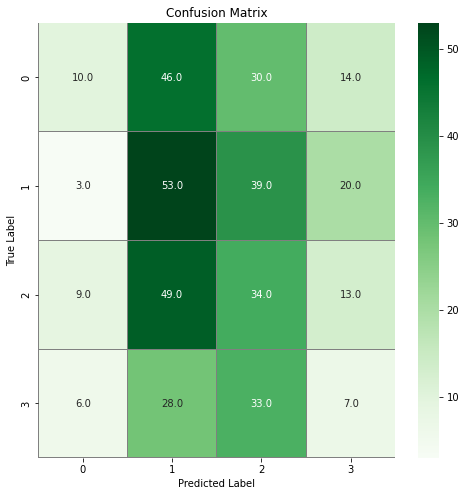

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(test_data.classes,vgg_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
len(test_data)

13

array([1., 0., 0., 0.], dtype=float32)

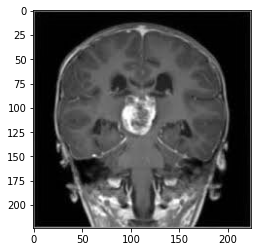

In [ ]:
plt.imshow(test_data[0][0][1])
test_data[0][1][1]

10
9
3
0
8
2
1
4
7
6


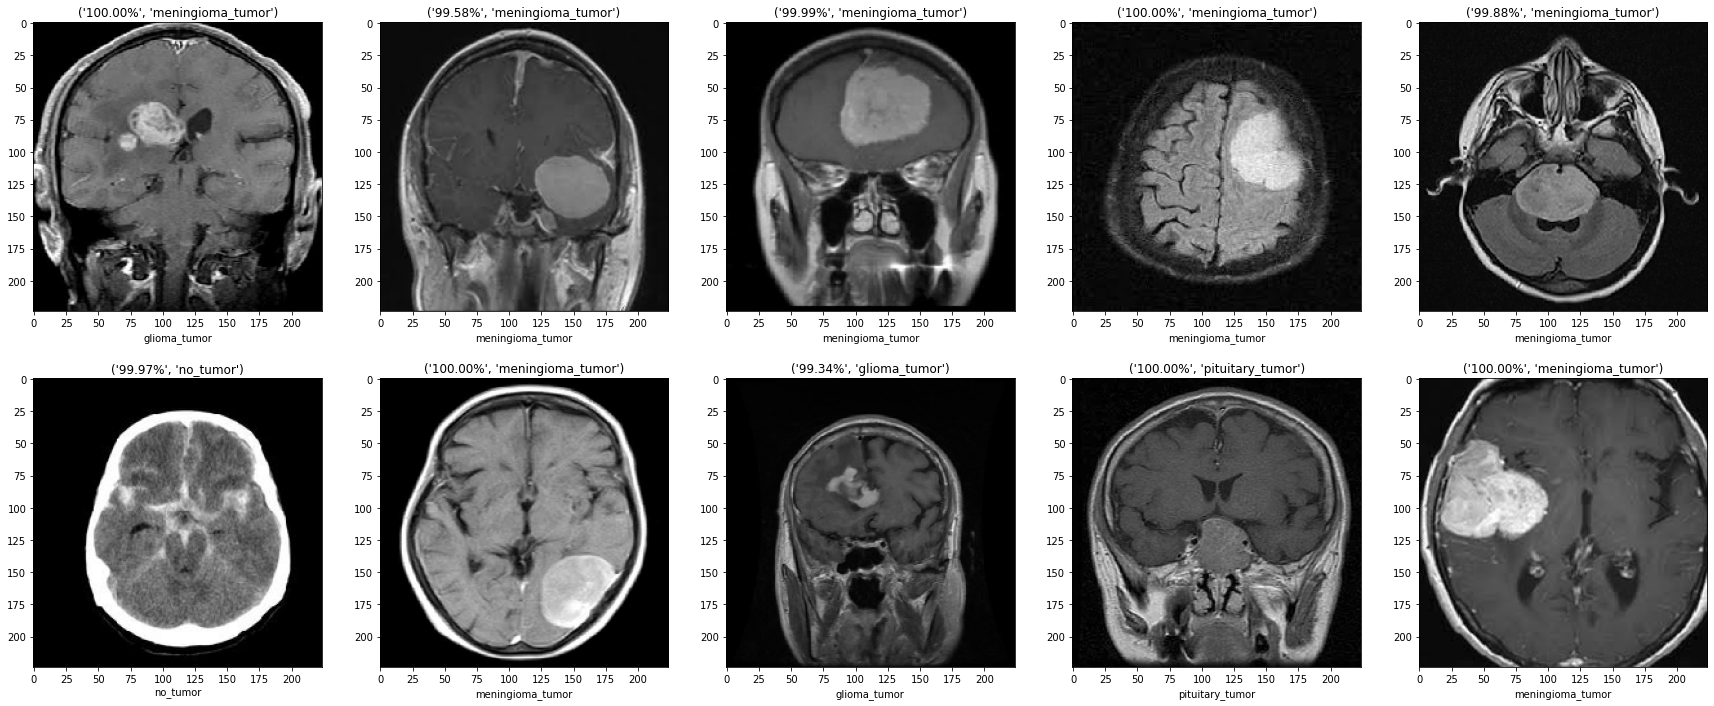

In [ ]:
#batch 0
import random
fig = plt.figure(figsize=(30, 12))
randomlist = random.sample(range(0, 13), 10)
rows = 2
columns = 5
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(test_data[i][1][0] == 1)
  rrr=rr[0][0]

  aa=test_data[i][1][0]
  bb=test_data[i][0][0]
  bb=np.expand_dims(bb,axis=0)
  z=model.predict(bb)
  zz=np.argmax(z, axis=1)
  
  if zz[0]==0:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==1:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==2:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  else :
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  plt.imshow(test_data[i][0][0])
  print(i)

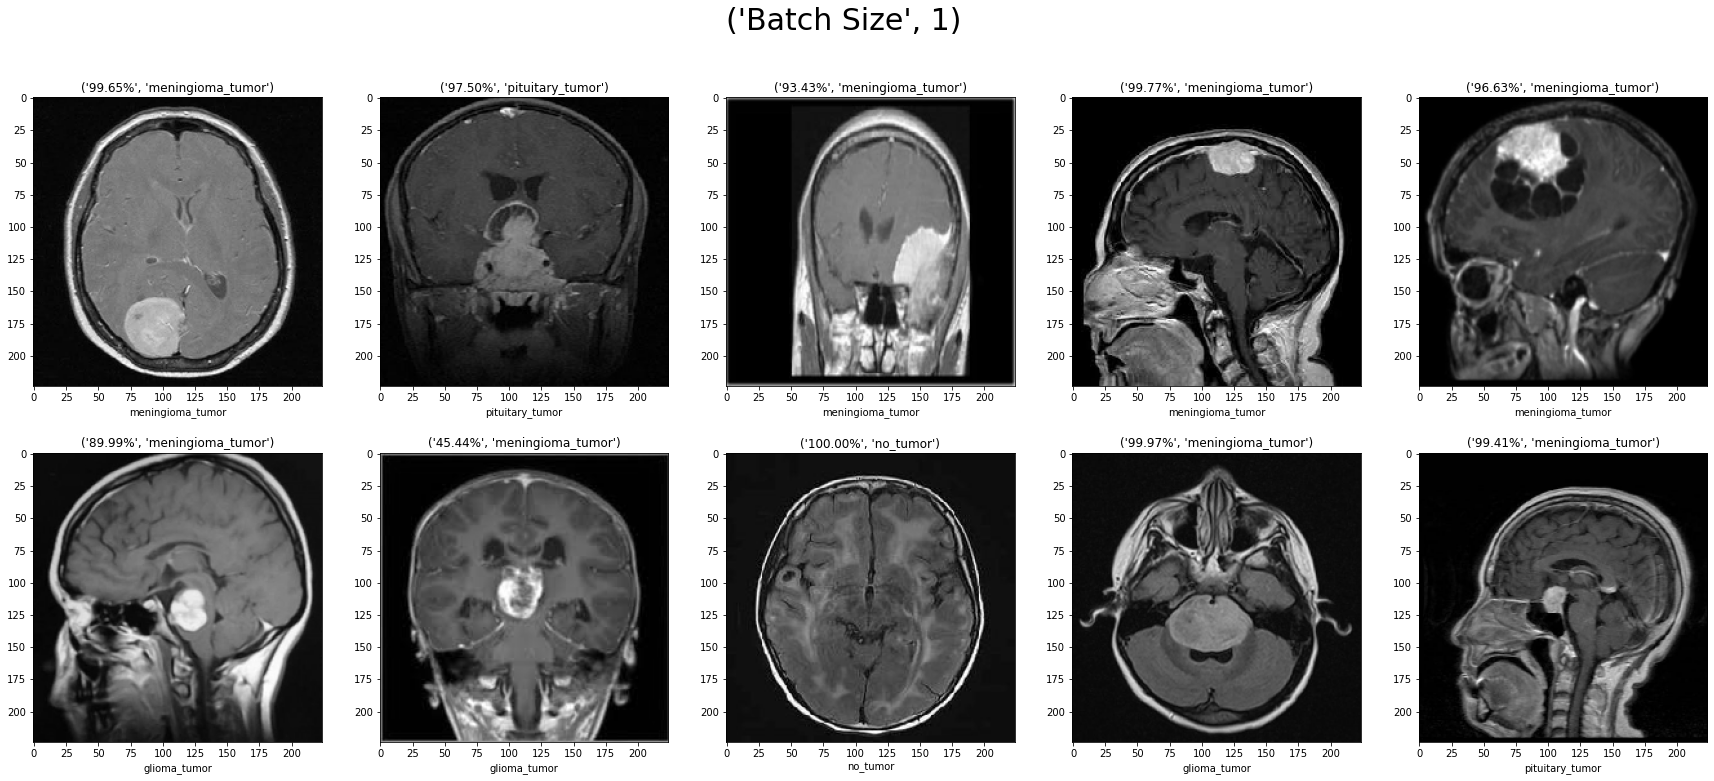

In [ ]:
#batch 1
import random
fig = plt.figure(figsize=(30, 12))
randomlist = random.sample(range(0, 13), 10)
rows = 2
columns = 5
bs=1 
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(test_data[i][1][bs] == 1)
  rrr=rr[0][0]

  aa=test_data[i][1][bs]
  bb=test_data[i][0][bs]
  bb=np.expand_dims(bb,axis=0)
  z=model.predict(bb)
  zz=np.argmax(z, axis=1)
  fig.suptitle(("Batch Size",bs),fontsize=30)
  if zz[0]==0:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==1:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==2:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  else :
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  plt.imshow(test_data[i][0][bs])
  #print(i)


In [ ]:
len(test_data)

13

In [ ]:
13*32

416

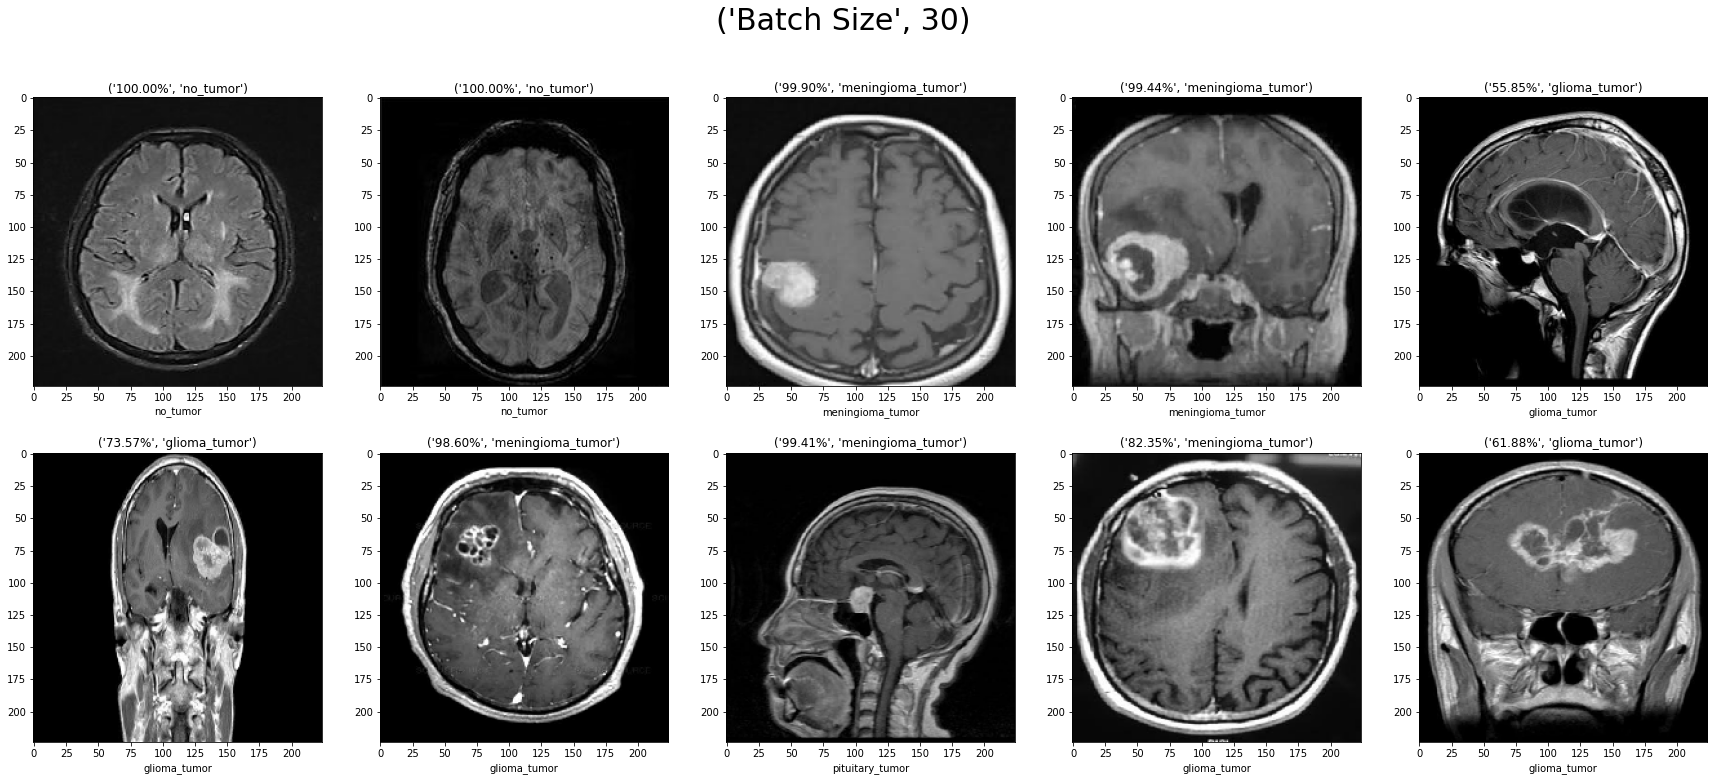

In [ ]:
#batch 1
import random
fig = plt.figure(figsize=(30, 12))
randomlist = random.sample(range(0, 10), 10)
rows = 2
columns = 5
bs= 30
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(test_data[i][1][bs] == 1)
  rrr=rr[0][0]

  aa=test_data[i][1][bs]
  bb=test_data[i][0][bs]
  bb=np.expand_dims(bb,axis=0)
  z=model.predict(bb)
  zz=np.argmax(z, axis=1)
  fig.suptitle(("Batch Size",bs),fontsize=30)
  if zz[0]==0:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==1:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==2:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  else :
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  plt.imshow(test_data[i][0][bs])
  #print(i)
